<a href="https://colab.research.google.com/github/fwade0572/Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/master/DSC400_T301_1_2_Assignment_Faith_Wade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Cleaning
- Load the ‘Customer Behavior’ dataset into a pandas DataFrame.

- Perform necessary data cleaning activities, including handling missing values and correcting inconsistencies.

In [63]:
# Importing the data.
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
customer_behavior_df = pd.read_csv("customer_behavior.csv")
print("Initial Data:")
print(customer_behavior_df.head())

Saving customer_behavior.csv to customer_behavior (2).csv
Initial Data:
   SessionID  UserID   Platform  SessionDuration  PagesVisited  PurchaseMade  \
0          1     861    Website           257.88           2.0             0   
1          2    1295  MobileApp           344.09          10.0             0   
2          3    1131    Website           889.88           4.0             0   
3          4    1096    Website           617.78           7.0             0   
4          5    1639    Website          1016.97           3.0             0   

      SessionStartTime  
0  2021-06-01 00:00:00  
1  2021-06-01 00:01:00  
2  2021-06-01 00:02:00  
3  2021-06-01 00:03:00  
4  2021-06-01 00:04:00  


In [64]:
# Checking for missing values:
customer_behavior_df.isnull().sum()
# Handling missing values (using the median method):
customer_behavior_df['Platform'] = customer_behavior_df['Platform'].fillna('Unknown')
customer_behavior_df['SessionDuration'] = customer_behavior_df['SessionDuration'].fillna(customer_behavior_df['SessionDuration'].median())
customer_behavior_df['PagesVisited'] = customer_behavior_df['PagesVisited'].fillna(customer_behavior_df['PagesVisited'].median())
customer_behavior_df.isnull().sum()

,0
SessionID,0
UserID,0
Platform,0
SessionDuration,0
PagesVisited,0
PurchaseMade,0
SessionStartTime,0


In [65]:
# Fixing inconsistencies:
customer_behavior_df['Platform'] = customer_behavior_df['Platform'].str.strip().str.title()
# Converting Data Types:
customer_behavior_df['SessionStartTime'] = pd.to_datetime(customer_behavior_df['SessionStartTime'])

In [66]:
# Double-Checking Cleaned Dataset:
customer_behavior_df.info()
customer_behavior_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SessionID         10000 non-null  int64         
 1   UserID            10000 non-null  int64         
 2   Platform          10000 non-null  object        
 3   SessionDuration   10000 non-null  float64       
 4   PagesVisited      10000 non-null  float64       
 5   PurchaseMade      10000 non-null  int64         
 6   SessionStartTime  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 547.0+ KB


,0
SessionID,0
UserID,0
Platform,0
SessionDuration,0
PagesVisited,0
PurchaseMade,0
SessionStartTime,0


# Data Exploration and Feature Engineering
- Explore the dataset to identify potential insights.

- Create new columns or features that could help in deriving more complex insights.

Data Exploration:

In [67]:
print("Description:\n")
print(customer_behavior_df.describe())

print("\nValue Counts:\n")
print(customer_behavior_df['Platform'].value_counts())
print(customer_behavior_df['PurchaseMade'].value_counts())

print("\nComparing Attributes:\n")
print(customer_behavior_df.groupby('Platform')['SessionDuration'].mean())
print(customer_behavior_df.groupby('Platform')['PagesVisited'].mean())

Description:

         SessionID        UserID  SessionDuration  PagesVisited  PurchaseMade  \
count  10000.00000  10000.000000     10000.000000  10000.000000  10000.000000   
mean    5000.50000   1502.626900       594.041517      4.988900      0.292200   
min        1.00000      1.000000         2.380000      0.000000      0.000000   
25%     2500.75000    762.750000       293.547500      4.000000      0.000000   
50%     5000.50000   1493.000000       499.645000      5.000000      0.000000   
75%     7500.25000   2250.250000       788.275000      6.000000      1.000000   
max    10000.00000   3000.000000      3237.180000     20.000000      1.000000   
std     2886.89568    865.021722       416.214544      2.168513      0.454796   

          SessionStartTime  
count                10000  
mean   2021-06-04 11:19:30  
min    2021-06-01 00:00:00  
25%    2021-06-02 17:39:45  
50%    2021-06-04 11:19:30  
75%    2021-06-06 04:59:15  
max    2021-06-07 22:39:00  
std                    N

Feature Engineering:

In [68]:
print("Adding a New Column:\n")
conditions = [
    (customer_behavior_df['SessionDuration'] < 300) & (customer_behavior_df['PagesVisited'] < 3),
    (customer_behavior_df['SessionDuration'].between(300, 900)) & (customer_behavior_df['PagesVisited'].between(3, 7)),
    (customer_behavior_df['SessionDuration'] < 900) & (customer_behavior_df['PagesVisited'] < 7)
]

labels = ['Low', 'Medium', 'High']

customer_behavior_df['Engagement Level'] = np.select(
    conditions,
    labels,
    default = 'Unknown'
)

print(customer_behavior_df.head())


Adding a New Column:

   SessionID  UserID   Platform  SessionDuration  PagesVisited  PurchaseMade  \
0          1     861    Website           257.88           2.0             0   
1          2    1295  Mobileapp           344.09          10.0             0   
2          3    1131    Website           889.88           4.0             0   
3          4    1096    Website           617.78           7.0             0   
4          5    1639    Website          1016.97           3.0             0   

     SessionStartTime Engagement Level  
0 2021-06-01 00:00:00              Low  
1 2021-06-01 00:01:00          Unknown  
2 2021-06-01 00:02:00           Medium  
3 2021-06-01 00:03:00           Medium  
4 2021-06-01 00:04:00          Unknown  


# Data Aggregation
- Use the groupby function to aggregate data by relevant categories to discover trends and patterns.

In [69]:
print("Average Session Duration by Platform:\n")
avg_duration = customer_behavior_df.groupby('Platform')['SessionDuration'].mean()
print(avg_duration)

print("\nTotal Purchases by Platform:\n")
purchase_counts = customer_behavior_df.groupby('Platform')['PurchaseMade'].mean()
print(purchase_counts)

print("\nAverage Pages Visited by Purchase Outcome:\n")
avg_pages = customer_behavior_df.groupby('PurchaseMade')['PagesVisited'].mean()
print(avg_pages)

Average Session Duration by Platform:

Platform
Mobileapp    592.468979
Unknown      605.860419
Website      595.134488
Name: SessionDuration, dtype: float64

Total Purchases by Platform:

Platform
Mobileapp    0.300472
Unknown      0.246073
Website      0.285830
Name: PurchaseMade, dtype: float64

Average Pages Visited by Purchase Outcome:

PurchaseMade
0    4.988415
1    4.990075
Name: PagesVisited, dtype: float64


# Data Visualization
- Choose and create at least one visualization (using Matplotlib or Seaborn) to represent the trends and patterns discovered.

- Ensure the visualization is clear and supported by a caption explaining its relevance.

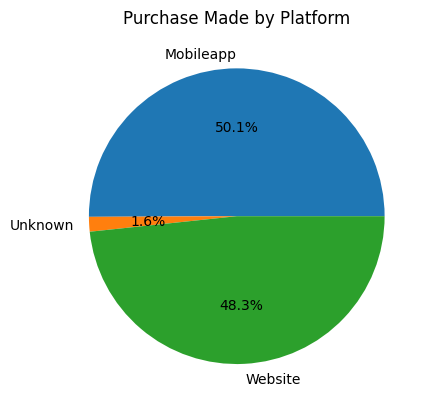

In [75]:
import matplotlib.pyplot as plt
pie_chart = customer_behavior_df.groupby('Platform')['PurchaseMade'].sum()
plt.pie(pie_chart, labels = pie_chart.index, autopct = '%1.1f%%')
plt.title('Purchase Made by Platform')
plt.show()

# Code Attribution:

Title: 1.2 Assignment

Author: Wes McKinney

Date: 07 December 2025

Modified By: Faith Wade

Description: This program is used to take Data Cleaning, Exploration, Engineering, Aggregation, and Visualization and combine it with Big Data as an introduction.
***
Title: Python for Data Analysis

Author: Wes McKinney

Date: 07 December 2025

Modified By: Faith Wade

Description: This program was modified to take the Customer Behvaior Dataset and implement Data Cleaning, Exploration, Engineering, Aggregation, and Visualization as a way to introduce the process and using Big Data.

Source(s):

https://github.com/bellevue-university/dsc400-updated/blob/main/11-week/week01/week1_assignment.ipynb

https://www.freecodecamp.org/news/data-cleaning-and-preprocessing-with-pandasbdvhj/

https://www.w3schools.com/python/matplotlib_pie_charts.asp